## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the dataset
country_df = pd.read_csv('Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Check the shape
country_df.shape

(167, 10)

In [5]:
# Check datatypes & counts
country_df.dtypes.value_counts()

float64    7
int64      2
object     1
dtype: int64

In [6]:
# Get descriptive statistics
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Identify any missing data
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
country_df = country_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).dropna(axis=1)
country_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


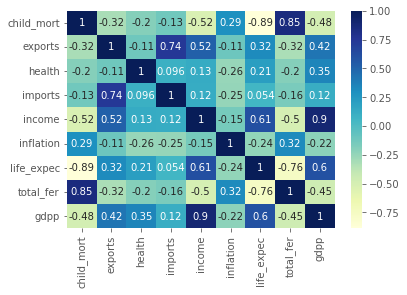

In [9]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
corr_map = sns.heatmap(country_df.corr(), cmap="YlGnBu", annot=True)


#### The features that have the strongest correlations are:
- Income and gdpp
- child_mort and total_fer
- exports and imports

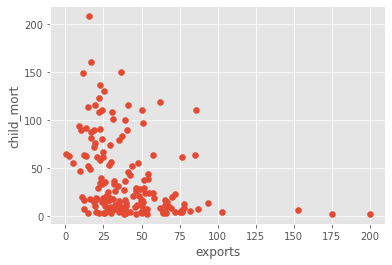

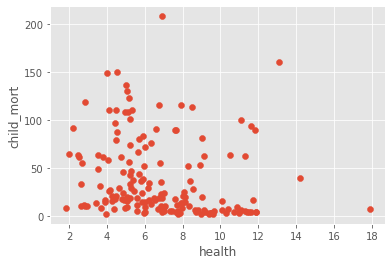

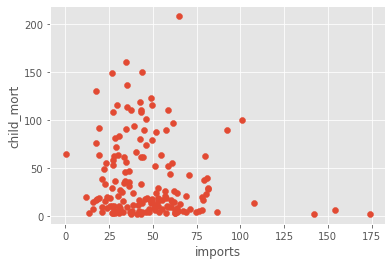

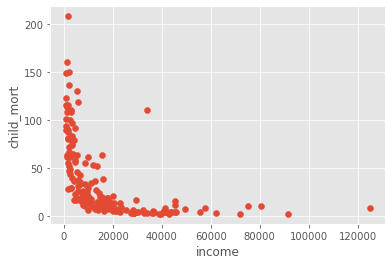

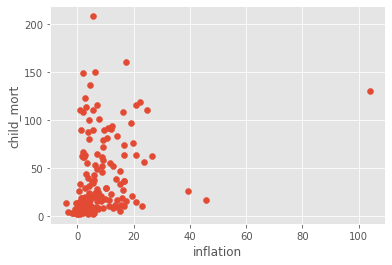

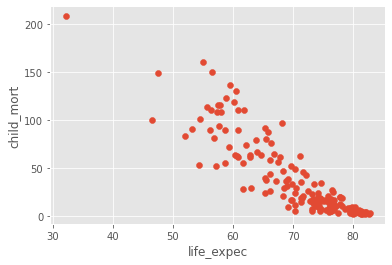

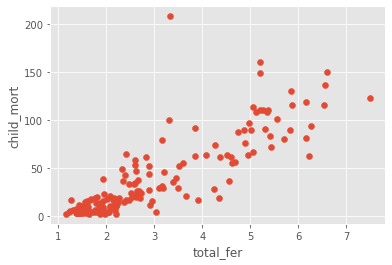

In [10]:
# Explore the continuous independent features against child_mort using scatter plots.
for f in country_df.columns[1:-1]:
  plt.scatter(country_df[f], country_df['child_mort'])
  plt.xlabel(f)
  plt.ylabel('child_mort')
  plt.show()

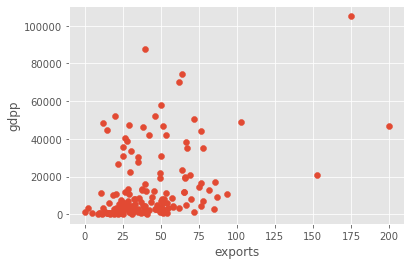

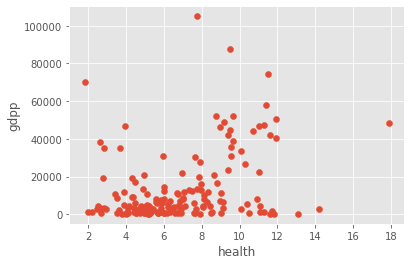

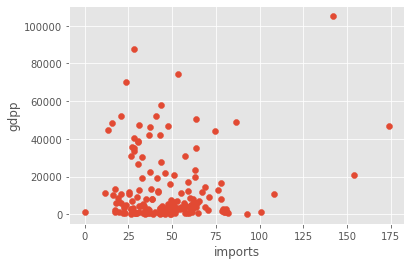

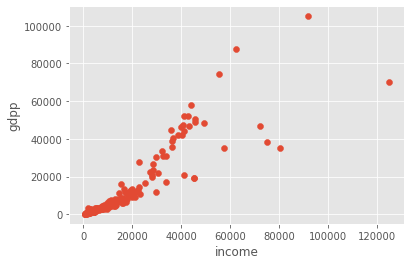

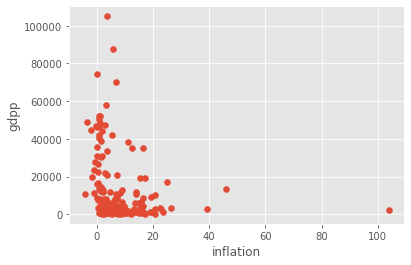

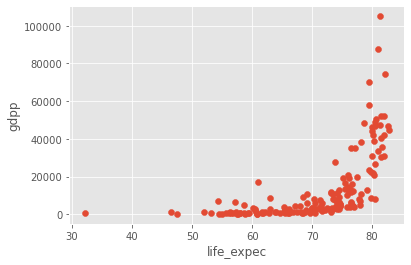

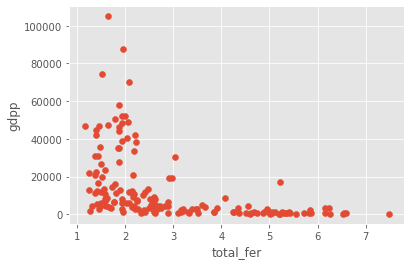

In [11]:
# Explore the continuous independent features against gdpp using scatter plots.

for f in country_df.columns[1:-1]:
  plt.scatter(country_df[f], country_df['gdpp'])
  plt.xlabel(f)
  plt.ylabel('gdpp')
  plt.show()

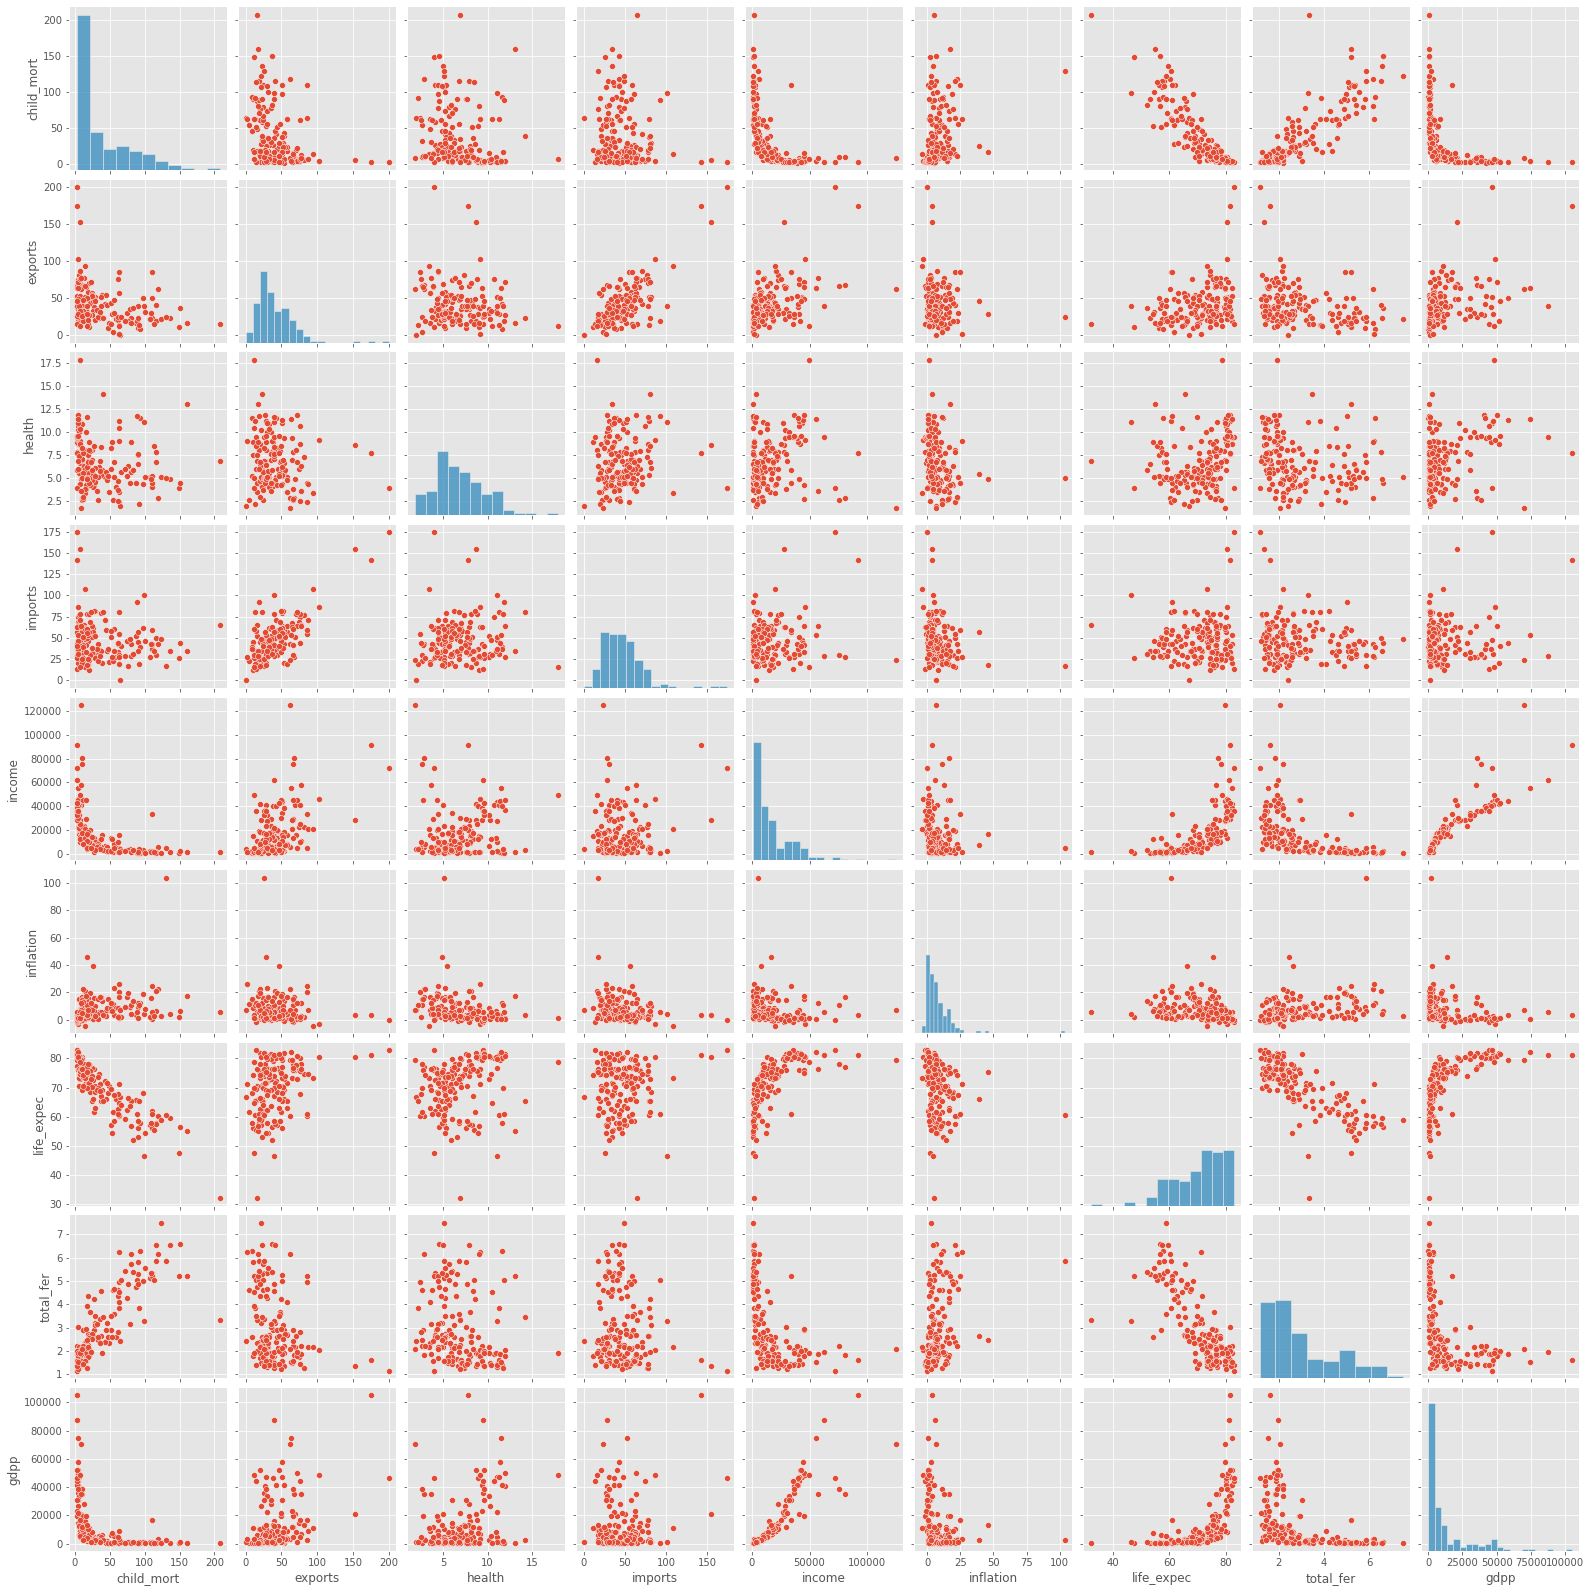

In [12]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(country_df)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [13]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
df_scaled = MinMaxScaler()
df_scaled = df_scaled.fit_transform(country_df)

col_names = list(country_df.columns)
df_scaled = pd.DataFrame(df_scaled,  columns=col_names)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


<AxesSubplot:title={'center':'MinMaxScaler'}, xlabel='child_mort', ylabel='Density'>

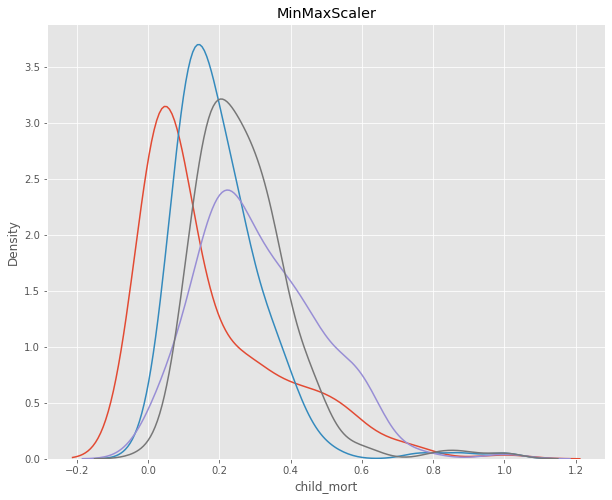

In [14]:
fig, (ax2) = plt.subplots(ncols=1, figsize = (10,8))
ax2.set_title('MinMaxScaler')

sns.kdeplot(df_scaled['child_mort'], ax=ax2)
sns.kdeplot(df_scaled['exports'], ax=ax2)
sns.kdeplot(df_scaled['health'], ax=ax2)
sns.kdeplot(df_scaled['imports'], ax=ax2)

## K-Means Clustering

### Selecting K

In [15]:
# Prepare data for clustering, note that we do not supply y in an unsupervised learning task.
X = df_scaled[['health','total_fer']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(167, 2)


C:\Users\ThobejaneM\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


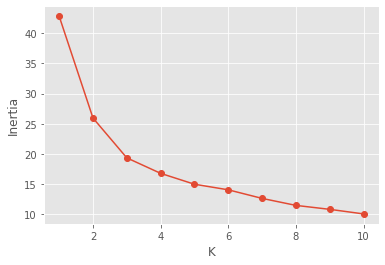

In [16]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled)

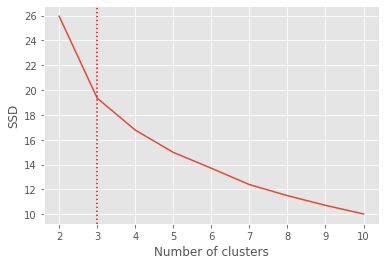

In [17]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

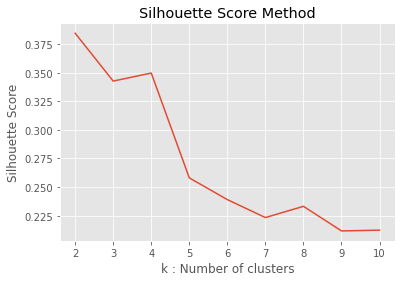

In [18]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method, the optimal value of K is 3.

## Fitting a K-Means Model with the selected K value

Using KMeans to form clusters of 2,3 and 4.

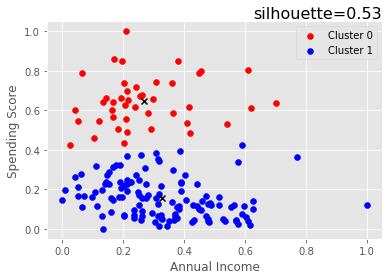

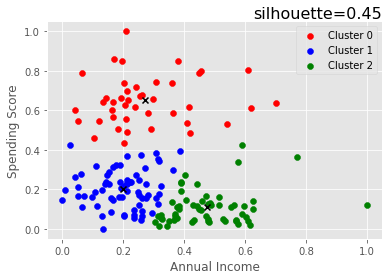

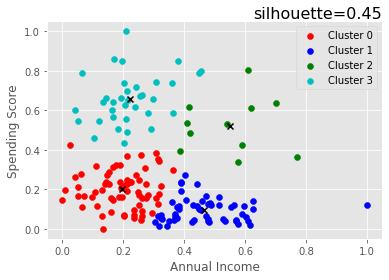

In [19]:
# Remember to set the random_state to rseed
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
#     x['kmean'] = y_pred.labels
    
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(2,5):
  scatter_Kmeans(X, k, r=0)

In [20]:
# Count the number of records in each cluster
kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
kmeans.fit(X)

from collections import Counter
print(Counter(kmeans.labels_))# Visualisation of clusters
def K_means_model(k):
    kmean = KMeans(n_clusters = k, random_state = rseed)
    kmean.fit(df_scaled)
    country_df_kmean = country_df.copy() # copy the actual data into a new dataframe to explain the cluster profiling
    label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
    country_df_kmean = pd.concat([country_df_kmean, label], axis =1) # assign the countries with the cluster labels.
    print("Number of records in each cluster(k=%s):" %k)
    print(country_df_kmean.k_means_cluster_label.value_counts())# shows how many countries are in each cluster
    return(country_df_kmean) # returns clustered labelled dataset for further analysis

Counter({0: 66, 3: 54, 1: 33, 2: 14})


In [21]:
# Created Models are available globally to access inside cluster profiling functions
k_2_model = K_means_model(2) 
k_3_model = K_means_model(3) 
k_4_model = K_means_model(4) 

Number of records in each cluster(k=2):
0    116
1     51
Name: k_means_cluster_label, dtype: int64
Number of records in each cluster(k=3):
1    87
0    46
2    34
Name: k_means_cluster_label, dtype: int64
Number of records in each cluster(k=4):
2    88
1    46
3    30
0     3
Name: k_means_cluster_label, dtype: int64


In [22]:
# Check model performance with the silhouette coefficient

# determining the maximum number of clusters 
# using the simple method
limit = int((X.shape[0]//2)**0.5)
 
# determining number of clusters
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    pred = model.predict(X)
    score = silhouette_score(X, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.530
Silhouette Score for k = 3: 0.452
Silhouette Score for k = 4: 0.442
Silhouette Score for k = 5: 0.374
Silhouette Score for k = 6: 0.370
Silhouette Score for k = 7: 0.375
Silhouette Score for k = 8: 0.365
Silhouette Score for k = 9: 0.366


## Predictions

In [23]:
# Add the predicted cluster label column to the original dataframe
predict = kmeans.predict(X)
country_df['Predicted_cluster'] = pd.Series(predict, index=country_df.index)
# df_scaled['kmean'] = kmeans.labels_
# df_scaled['kmean'].value_counts()
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted_cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Visualisation of clusters

In [24]:
# Function for Profiling Clusters to plot scatter plots
def clusters_scatter_plots(col1, col2):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_2_model, palette=['blue','green'])
    plt.subplot(2,2,2)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_3_model, palette=['orange','blue','green'])
    plt.subplot(2,2,3)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_4_model, palette=['red','orange','maroon','green'])

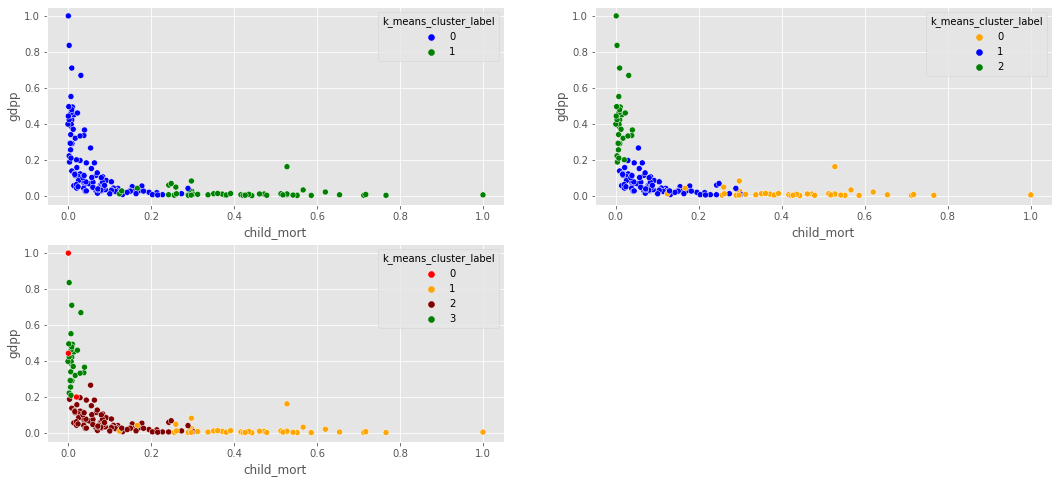

In [25]:
clusters_scatter_plots(df_scaled['child_mort'],df_scaled['gdpp'])

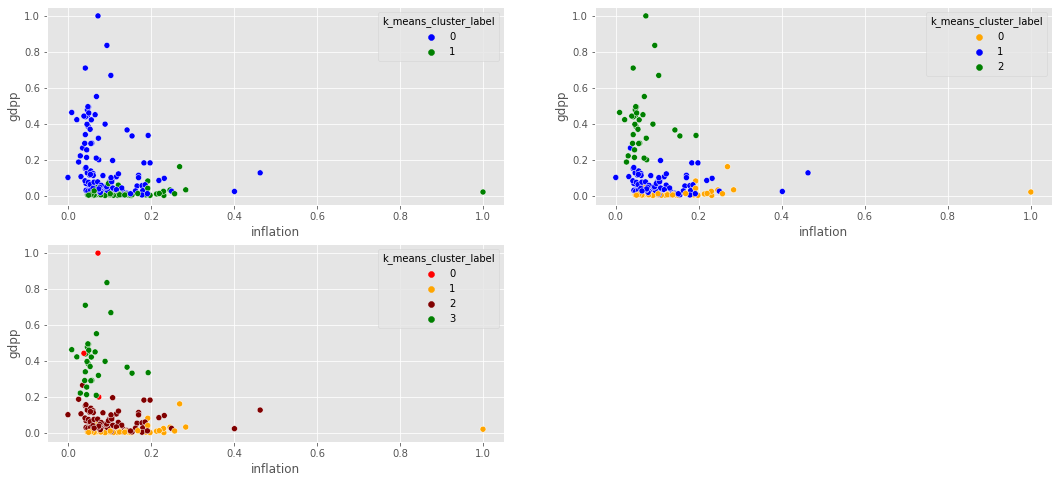

In [26]:
# Visualisation of clusters: inflation vs gdpp
clusters_scatter_plots(df_scaled['inflation'],df_scaled['gdpp'])

## Creating Cluster Labels

In [27]:
country_df_kmean = country_df.copy()
label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
label.head()

,k_means_cluster_label
0,0
1,8
2,4
3,0
4,1


In [28]:
country_df_kmean = pd.concat([country_df_kmean, label], axis =1)
country_df_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted_cluster,k_means_cluster_label
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,8
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,4
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [30]:
profiling_cols = ['gdpp','child_mort','inflation'] # create a list to store profiling variables


In [32]:
# complete linkage
mergings = linkage(df_scaled, method="complete", metric='euclidean')


In [33]:


# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [34]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted_cluster,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [35]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 0,'cluster_labels'] ='Least-Developed Countries'
country_df[country_df['cluster_labels'] == 'Least-Developed Countries']

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted_cluster,cluster_labels
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,Least-Developed Countries
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,Least-Developed Countries
17,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,Least-Developed Countries
25,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,Least-Developed Countries
26,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,Least-Developed Countries
28,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,Least-Developed Countries
31,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,Least-Developed Countries
32,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,Least-Developed Countries
37,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1,Least-Developed Countries
38,63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740,1,Least-Developed Countries


In [36]:
# Medium income, Medium GDP and Mild Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 1,'cluster_labels'] ='Developing Countries'
country_df[country_df['cluster_labels'] == 'Developing Countries']

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted_cluster,cluster_labels
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing Countries
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing Countries
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing Countries
5,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,3,Developing Countries
6,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,Developing Countries
...,...,...,...,...,...,...,...,...,...,...,...
161,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,Developing Countries
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Developing Countries
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing Countries
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Developing Countries


In [37]:
# High income, High GDP and Low Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 2,'cluster_labels'] ='Developed Countries'
country_df[country_df['cluster_labels'] == 'Developed Countries']

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted_cluster,cluster_labels
91,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,Developed Countries
98,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,Developed Countries
133,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,0,Developed Countries


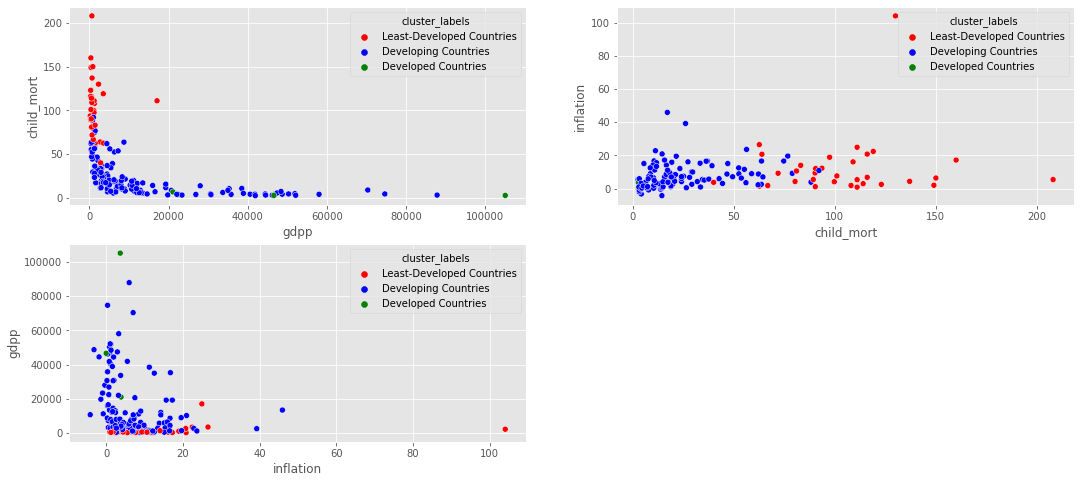

In [38]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = profiling_cols[i], y = profiling_cols[(i+1)%len(profiling_cols)], hue = 'cluster_labels', data = country_df, palette=['red','blue','green'])

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**


- Least-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.
- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.